# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# 下載資料
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
# 28 * 28 => reshape 784
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# 標準化
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
# one-hot encoding
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

In [8]:
#模型 加入 隱藏層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#input_dim=784 設定輸入層神經元個數
#kernel_initializer='normal' 使用常態分佈亂數，初始化 weight & bias

In [9]:
#模型 加入 輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 函數解說:
# https://read01.com/670OQ8.html
# https://kknews.cc/zh-tw/tech/ae8oann.html
# http://www.sohu.com/a/144427458_610300

In [10]:
print(model.summary())

# 輸入與隱藏層 函式: h1 = relu(x*w1+b1)
# 隱藏層與輸出 函式: y = softmax(h1*w2+b2)

# 隱藏層Param : 784(輸入神經元數量) * 256(隱藏層神經元數量) + 256(隱藏層神經元數量) = 200960
# 輸出層Param : 256(隱藏層神經元數量) * 10(輸出神經元數量) + 10(輸出神經元數量) = 2570
# 200960 + 2570 = 203530

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

#設定損失函數: loss='categorical_crossentropy' #crossentropy:交叉熵
#設定優化方法: optimizer='adam'
#設定模型評估: metrics=['accuracy']

#crossentropy
#https://hit-scir.gitbooks.io/neural-networks-and-deep-learning-zh_cn/content/chap3/c3s3.html
#https://hit-scir.gitbooks.io/neural-networks-and-deep-learning-zh_cn/content/chap3/c3s1.html

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

# validation_split=0.2  設定切割 20% 的驗證資料， 80%的訓練資料
# epochs=10  設定10次訓練的loop
# batch_size=200  每一批次訓練為200筆資料 (48000/200=240批次的訓練)
# verbose=2 設定顯示訓練內容

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 0.4395 - acc: 0.8824 - val_loss: 0.2183 - val_acc: 0.9404
Epoch 2/10
2s - loss: 0.1913 - acc: 0.9454 - val_loss: 0.1560 - val_acc: 0.9557
Epoch 3/10
2s - loss: 0.1359 - acc: 0.9614 - val_loss: 0.1261 - val_acc: 0.9648
Epoch 4/10
2s - loss: 0.1033 - acc: 0.9702 - val_loss: 0.1127 - val_acc: 0.9678
Epoch 5/10
2s - loss: 0.0816 - acc: 0.9774 - val_loss: 0.0983 - val_acc: 0.9721
Epoch 6/10
2s - loss: 0.0662 - acc: 0.9818 - val_loss: 0.0942 - val_acc: 0.9718
Epoch 7/10
2s - loss: 0.0548 - acc: 0.9851 - val_loss: 0.0913 - val_acc: 0.9733
Epoch 8/10
2s - loss: 0.0460 - acc: 0.9877 - val_loss: 0.0830 - val_acc: 0.9764
Epoch 9/10
2s - loss: 0.0382 - acc: 0.9900 - val_loss: 0.0825 - val_acc: 0.9759
Epoch 10/10
2s - loss: 0.0317 - acc: 0.9916 - val_loss: 0.0806 - val_acc: 0.9764


# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

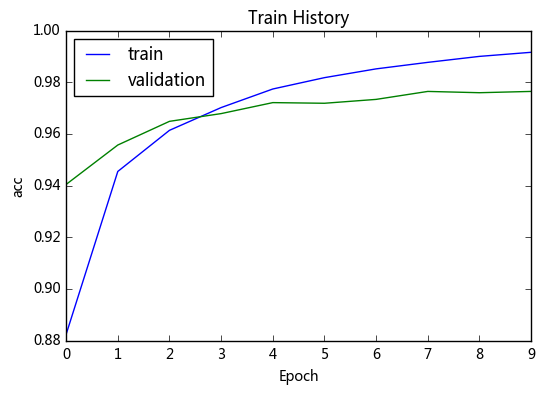

In [14]:
show_train_history(train_history,'acc','val_acc')
# Train acc 比 Val acc 稍高，是否有些 overfitting? 
# 修正overfitting的方式最後再補充!

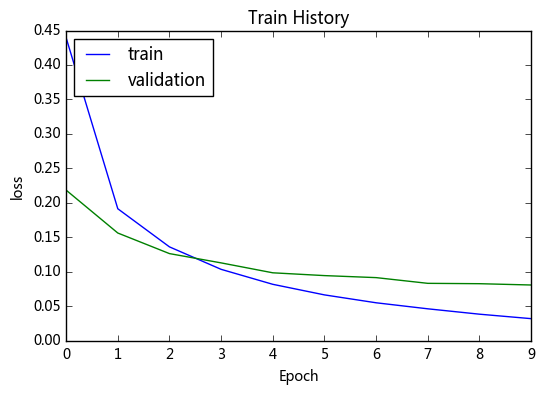

In [15]:
show_train_history(train_history,'loss','val_loss')

# 以測試資料評估模型準確率

In [16]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
# What is you accuracy socre ? (0.9758)
# 97.58% 的準確率!

 9120/10000 [==========================>...] - ETA: 0s
accuracy= 0.9757


# 使用建立的模型，以測試資料集的圖形 進行預測，預測Label

In [17]:
prediction=model.predict_classes(x_Test)

 9024/10000 [==========================>...] - ETA: 0s

In [18]:
print(len(prediction))
prediction

10000


array([7, 2, 1, ..., 4, 5, 6])

In [19]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25  #如果筆數 >25就設定25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i) # 設定 5*5 圖形
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([]) #設定不顯示刻度  
        idx+=1 #讀取下一筆
    plt.show()

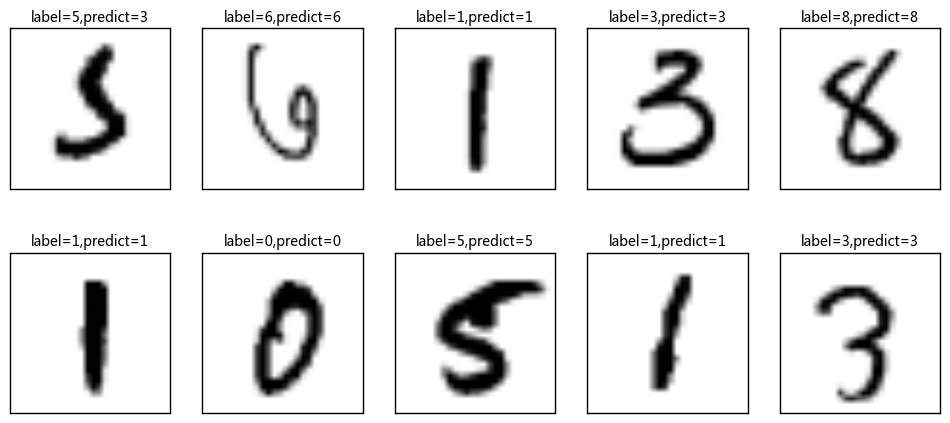

In [20]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [21]:
# 對角線表示正確預測數
# 非對角線表示某Label 預測錯誤
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1009,1,1,0,2,5,8,0
3,0,0,4,991,0,1,0,4,7,3
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,851,7,2,9,3
6,6,3,2,1,4,3,937,0,2,0
7,0,5,12,7,1,0,0,991,4,8
8,5,0,3,5,1,1,1,2,955,1


In [22]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [23]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


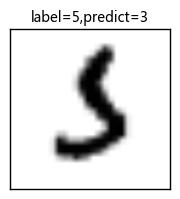

In [24]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

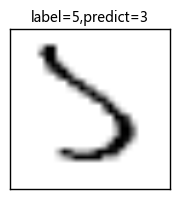

In [25]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1393,num=1)

# 將隱藏層增加至1000個神經元，看預測準確率狀況...(其餘數字大同小異)

In [26]:
model = Sequential()

In [27]:
#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [28]:
#將「輸出層」加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [30]:
train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
8s - loss: 0.2910 - acc: 0.9164 - val_loss: 0.1532 - val_acc: 0.9564
Epoch 2/10
8s - loss: 0.1152 - acc: 0.9672 - val_loss: 0.1208 - val_acc: 0.9644
Epoch 3/10
8s - loss: 0.0735 - acc: 0.9790 - val_loss: 0.0917 - val_acc: 0.9729
Epoch 4/10
8s - loss: 0.0520 - acc: 0.9853 - val_loss: 0.0814 - val_acc: 0.9742
Epoch 5/10
8s - loss: 0.0360 - acc: 0.9904 - val_loss: 0.0826 - val_acc: 0.9748
Epoch 6/10
8s - loss: 0.0247 - acc: 0.9941 - val_loss: 0.0740 - val_acc: 0.9783
Epoch 7/10
8s - loss: 0.0184 - acc: 0.9956 - val_loss: 0.0731 - val_acc: 0.9779
Epoch 8/10
8s - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0742 - val_acc: 0.9787
Epoch 9/10
8s - loss: 0.0100 - acc: 0.9982 - val_loss: 0.0712 - val_acc: 0.9792
Epoch 10/10
8s - loss: 0.0068 - acc: 0.9991 - val_loss: 0.0791 - val_acc: 0.9769


## 以圖形顯示訓練過程

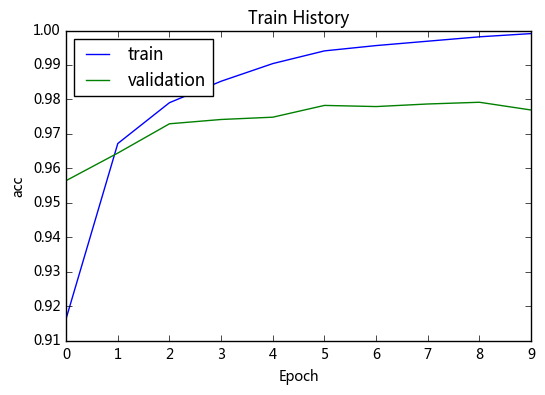

In [31]:
show_train_history(train_history,'acc','val_acc')
# Train acc 比 Val acc 偏離更多， overfitting情況更甚... 

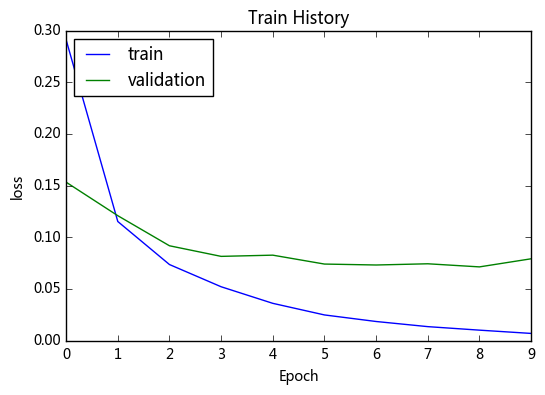

In [32]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [33]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
# What is you accuracy socre ? (0.9799 微升)

10000/10000 [==============================] - 1s     

accuracy= 0.9801


## 進行預測

In [34]:
prediction=model.predict_classes(x_Test)

 9696/10000 [============================>.] - ETA: 0s

In [35]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

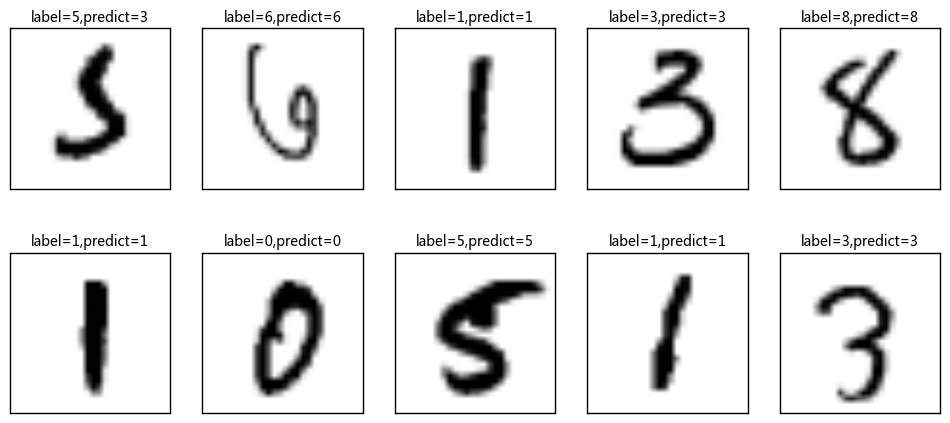

In [36]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

In [37]:
# confusion matrix
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,1,1,1,1,1,0
1,0,1128,2,0,0,1,2,0,2,0
2,9,1,993,6,3,0,2,7,11,0
3,0,0,1,991,0,3,0,3,4,8
4,1,0,0,1,959,0,5,2,0,14
5,2,0,0,8,1,864,7,2,4,4
6,4,2,0,1,3,3,944,0,1,0
7,1,3,4,2,0,0,0,1001,3,14
8,2,1,1,4,2,0,2,3,953,6


# 模型中加入 Dropout功能修正overfitting狀態
(修正overfitting的方式不只Dropout這一種喔!)

In [38]:
model = Sequential()

In [39]:
#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [40]:
#模型新增 Drop out功能
from keras.layers import Dropout
model.add(Dropout(0.5))

In [41]:
#將「輸出層」加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [42]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
#訓練模型
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
9s - loss: 0.3546 - acc: 0.8938 - val_loss: 0.1628 - val_acc: 0.9544
Epoch 2/10
8s - loss: 0.1596 - acc: 0.9534 - val_loss: 0.1177 - val_acc: 0.9654
Epoch 3/10
8s - loss: 0.1151 - acc: 0.9665 - val_loss: 0.0971 - val_acc: 0.9701
Epoch 4/10
9s - loss: 0.0916 - acc: 0.9725 - val_loss: 0.0878 - val_acc: 0.9725
Epoch 5/10
8s - loss: 0.0742 - acc: 0.9779 - val_loss: 0.0785 - val_acc: 0.9772
Epoch 6/10
8s - loss: 0.0640 - acc: 0.9796 - val_loss: 0.0768 - val_acc: 0.9783
Epoch 7/10
8s - loss: 0.0547 - acc: 0.9834 - val_loss: 0.0741 - val_acc: 0.9788
Epoch 8/10
8s - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0695 - val_acc: 0.9802
Epoch 9/10
8s - loss: 0.0411 - acc: 0.9871 - val_loss: 0.0673 - val_acc: 0.9803
Epoch 10/10
9s - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0669 - val_acc: 0.9815


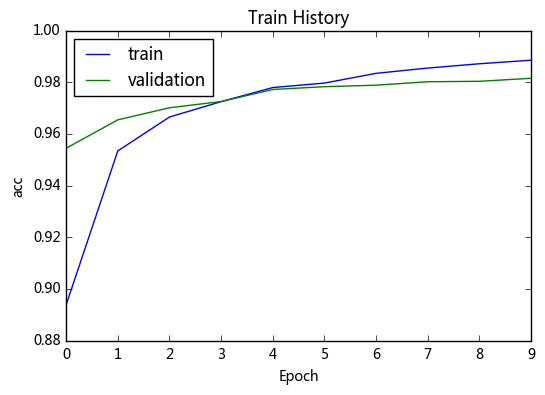

In [44]:
# 以圖形顯示訓練過程
show_train_history(train_history,'acc','val_acc')
# overfitting 修正，但似乎還有些許...，比較下可發現Acc還有所提升 !

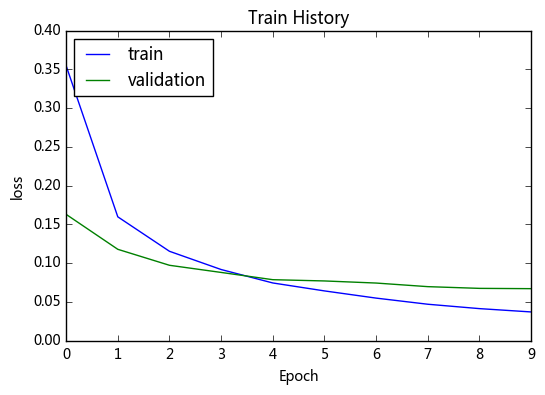

In [45]:
show_train_history(train_history,'loss','val_loss')

In [46]:
# 評估模型準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
# What is you accuracy socre ? (0.9824 微升)

 9792/10000 [============================>.] - ETA: 0s
accuracy= 0.9822


In [47]:
#進行預測
prediction=model.predict_classes(x_Test)

 9792/10000 [============================>.] - ETA: 0s

In [48]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

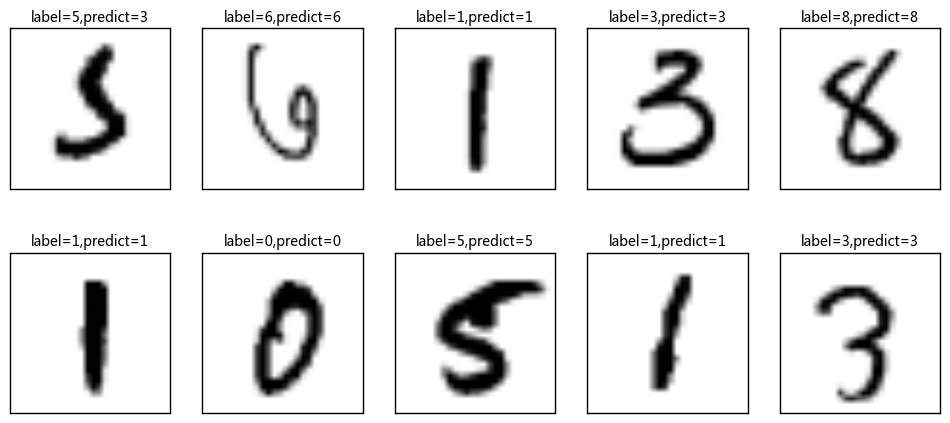

In [49]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

In [50]:
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,1,1,0,1,1,3,1,1,0
1,0,1128,3,0,0,0,2,0,2,0
2,3,1,1017,1,1,0,2,4,3,0
3,0,0,8,992,0,5,0,2,3,0
4,1,0,3,0,970,0,3,2,1,2
5,2,0,0,9,1,869,4,1,5,1
6,3,3,1,1,2,2,945,0,1,0
7,1,5,12,2,1,0,0,1002,0,5
8,2,1,5,6,2,1,2,2,952,1


# 增加至兩層隱藏層(數量1000)，並且兩隱藏層也加兩個Drop out功能，觀察結果...

In [51]:
model = Sequential()

In [52]:
#將「輸入層」與「隱藏層_1」加入模型
model.add(Dense(units=1000, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

#加入Drop out_1
model.add(Dropout(0.5))

In [53]:
#將「隱藏層_2」加入模型
model.add(Dense(units=1000, 
                kernel_initializer='normal', 
                activation='relu'))
#加入Drop out_2
model.add(Dropout(0.5))

In [54]:
#將「輸出層」加入模型
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [55]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
#訓練模型
#增加兩層的Dropout會造成執行負擔 ...
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2, 
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
23s - loss: 0.3746 - acc: 0.8830 - val_loss: 0.1331 - val_acc: 0.9608
Epoch 2/10
24s - loss: 0.1599 - acc: 0.9505 - val_loss: 0.0999 - val_acc: 0.9697
Epoch 3/10
21s - loss: 0.1195 - acc: 0.9624 - val_loss: 0.0945 - val_acc: 0.9708
Epoch 4/10
22s - loss: 0.0992 - acc: 0.9693 - val_loss: 0.0811 - val_acc: 0.9772
Epoch 5/10
21s - loss: 0.0825 - acc: 0.9742 - val_loss: 0.0767 - val_acc: 0.9771
Epoch 6/10
20s - loss: 0.0756 - acc: 0.9757 - val_loss: 0.0788 - val_acc: 0.9766
Epoch 7/10
21s - loss: 0.0651 - acc: 0.9790 - val_loss: 0.0767 - val_acc: 0.9791
Epoch 8/10
20s - loss: 0.0606 - acc: 0.9803 - val_loss: 0.0781 - val_acc: 0.9772
Epoch 9/10
20s - loss: 0.0540 - acc: 0.9819 - val_loss: 0.0768 - val_acc: 0.9789
Epoch 10/10
22s - loss: 0.0552 - acc: 0.9823 - val_loss: 0.0749 - val_acc: 0.9790


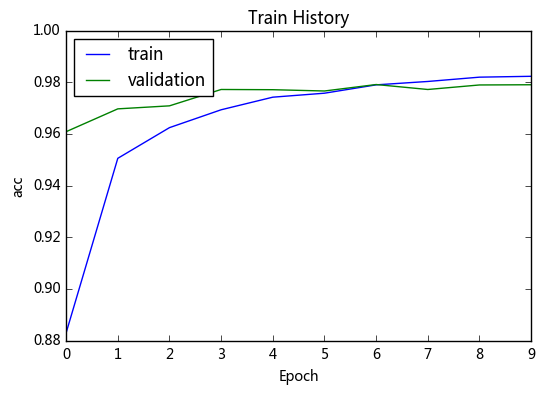

In [57]:
show_train_history(train_history,'acc','val_acc')
#訓練的準確率 與 驗證的準確率差距縮小 => 大致上已解決 Overfitting 問題

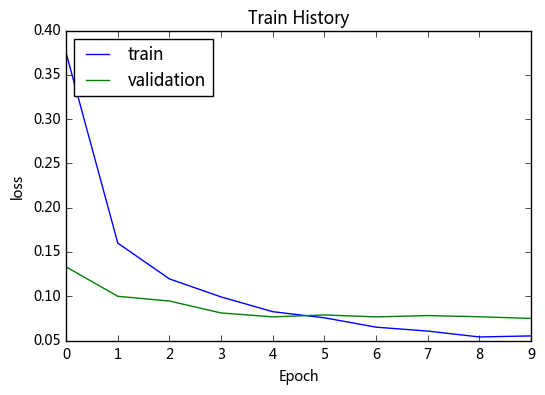

In [58]:
show_train_history(train_history,'loss','val_loss')

In [59]:
#評估模型準確率
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
# What is you accuracy socre ? (0.9819 微降)

 9920/10000 [============================>.] - ETA: 0s
accuracy= 0.9805


In [60]:
#進行預測
prediction=model.predict_classes(x_Test)

 9952/10000 [============================>.] - ETA: 0s

In [61]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

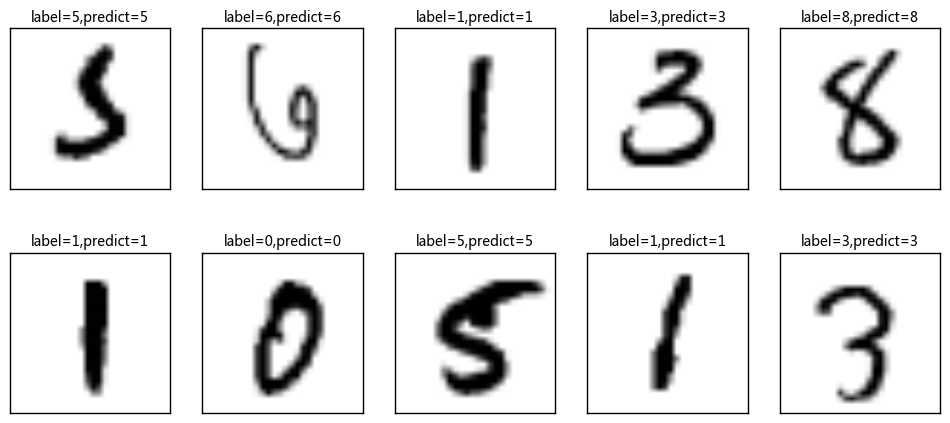

In [62]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

In [63]:
# confusion matrix
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,1,0,0,0,1,1,1,1,1
1,0,1124,6,1,0,1,2,0,1,0
2,4,1,1021,0,0,0,1,3,2,0
3,1,0,8,982,0,8,0,7,3,1
4,1,0,4,0,956,0,3,1,0,17
5,2,0,0,4,0,879,4,0,1,2
6,3,3,0,1,4,5,941,0,1,0
7,1,7,12,1,0,0,0,999,2,6
8,2,0,8,6,1,5,1,4,943,4


# 結論：隱藏層神經元個數增加 => 準確率上升，但Overfitting狀況更嚴重...
#            模型增加Drop out功能可修正Overfitting...

# 課題：需要多少層隱藏的神經層？以及建議的神經元數量？ 
https://read01.com/Pgz7y.html

# ...目前認為 就用試的ＸＤ

# 修正Overfitting 方法: 1.Regularization 2. Stop Early 3.Dropout